In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn import tree
from pandas_profiling import ProfileReport
import seaborn as sns


In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].mean())
df['body'] = df['body'].fillna(df['body'].mean())
df['survived'] = df['survived'].fillna(df['survived'].mean())
df['pclass'] = df['pclass'].fillna(df['pclass'].mean())
df['parch'] = df['parch'].fillna(df['parch'].mean())
df['sibsp'] = df['sibsp'].fillna(df['sibsp'].mean())



In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837516,0.485869,12.878277,1.041260,0.865230,51.719113,29.580239
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,160.809917
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,160.809917
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,160.809917
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [184]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.000000,1.000000,"Allen, Miss. Elisabeth Walton",female,29.000000,0.000000,0.000000,24160,211.337500,B5,S,2,160.809917,"St Louis, MO"
1,1.000000,1.000000,"Allison, Master. Hudson Trevor",male,0.916700,1.000000,2.000000,113781,151.550000,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1.000000,0.000000,"Allison, Miss. Helen Loraine",female,2.000000,1.000000,2.000000,113781,151.550000,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,1.000000,0.000000,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.000000,2.000000,113781,151.550000,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,1.000000,0.000000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.000000,2.000000,113781,151.550000,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.000000,0.000000,"Zabour, Miss. Thamine",female,29.881135,1.000000,0.000000,2665,14.454200,NaN,C,NaN,160.809917,NaN
1306,3.000000,0.000000,"Zakarian, Mr. Mapriededer",male,26.500000,0.000000,0.000000,2656,7.225000,NaN,C,NaN,304.000000,NaN
1307,3.000000,0.000000,"Zakarian, Mr. Ortin",male,27.000000,0.000000,0.000000,2670,7.225000,NaN,C,NaN,160.809917,NaN
1308,3.000000,0.000000,"Zimmerman, Mr. Leo",male,29.000000,0.000000,0.000000,315082,7.875000,NaN,S,NaN,160.809917,NaN


In [10]:
def survive(row):
    if row=='female':
        return 1
    if row=='male':
        return 0

In [8]:
df.drop(columns='survived',axis=1,inplace=True)

In [11]:
df['survived'] = df['sex'].apply(survive) 

In [12]:
df['survived'] = df['survived'].fillna(df['survived'].mean())

In [13]:
df['survived'] = df['survived'].astype(int)

In [14]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.000000,"Allen, Miss. Elisabeth Walton",female,29.000000,0.000000,0.000000,24160,211.337500,B5,S,2,160.809917,"St Louis, MO",1
1,1.000000,"Allison, Master. Hudson Trevor",male,0.916700,1.000000,2.000000,113781,151.550000,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON",0
2,1.000000,"Allison, Miss. Helen Loraine",female,2.000000,1.000000,2.000000,113781,151.550000,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",1
3,1.000000,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.000000,2.000000,113781,151.550000,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",0
4,1.000000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.000000,2.000000,113781,151.550000,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.000000,"Zabour, Miss. Thamine",female,29.881135,1.000000,0.000000,2665,14.454200,NaN,C,NaN,160.809917,NaN,1
1306,3.000000,"Zakarian, Mr. Mapriededer",male,26.500000,0.000000,0.000000,2656,7.225000,NaN,C,NaN,304.000000,NaN,0
1307,3.000000,"Zakarian, Mr. Ortin",male,27.000000,0.000000,0.000000,2670,7.225000,NaN,C,NaN,160.809917,NaN,0
1308,3.000000,"Zimmerman, Mr. Leo",male,29.000000,0.000000,0.000000,315082,7.875000,NaN,S,NaN,160.809917,NaN,0


In [15]:
x = df.drop(columns = ['name','ticket','cabin','embarked','boat','home.dest','body','survived'],axis=1)

In [27]:
x.drop(columns = 'sex',axis=1,inplace=True)

In [28]:
x.isna().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [19]:
y = df['survived']

In [20]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1305    1
1306    0
1307    0
1308    0
1309    0
Name: survived, Length: 1310, dtype: int32

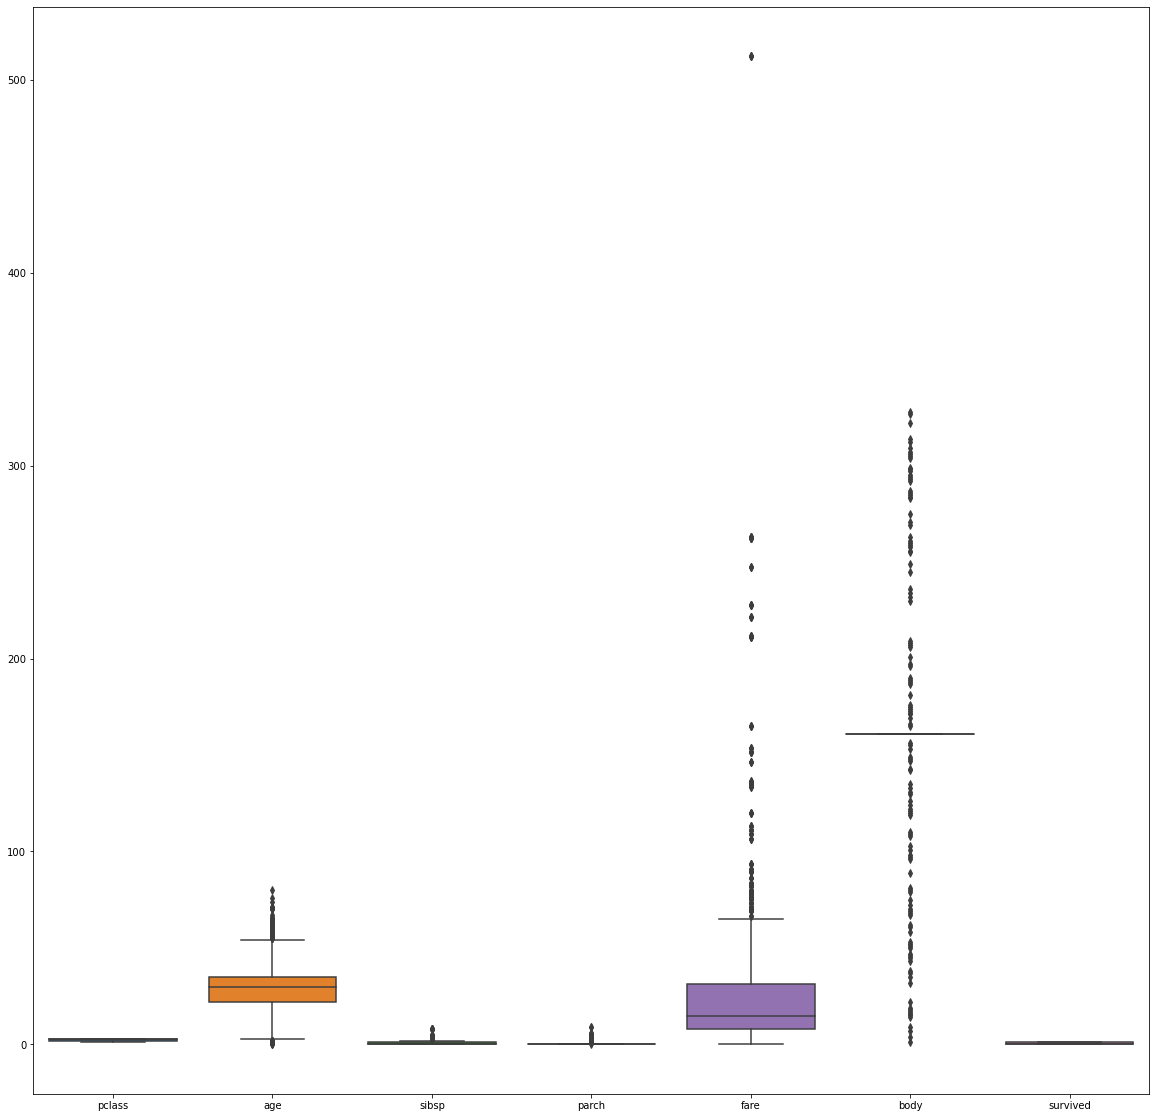

In [29]:
fig,axes = plt.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=axes)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=30)

In [31]:
x_train

,pclass,age,sibsp,parch,fare
277,1.0,29.881135,1.0,0.0,146.5208
944,3.0,29.881135,0.0,0.0,7.8958
1093,3.0,16.000000,0.0,0.0,9.2167
627,3.0,9.000000,4.0,2.0,31.2750
1077,3.0,29.881135,0.0,0.0,7.7500
...,...,...,...,...,...
919,3.0,18.500000,0.0,0.0,7.2292
1164,3.0,29.881135,0.0,0.0,7.2292
500,2.0,46.000000,0.0,0.0,26.0000
941,3.0,25.000000,0.0,0.0,7.2292


In [32]:
x_test

,pclass,age,sibsp,parch,fare
1295,3.0,21.000000,0.0,0.0,7.2500
610,3.0,40.000000,1.0,0.0,9.4750
1238,3.0,25.000000,0.0,0.0,7.7958
547,2.0,23.000000,0.0,0.0,15.0458
802,3.0,29.881135,0.0,0.0,6.9500
...,...,...,...,...,...
872,3.0,29.881135,0.0,0.0,8.0500
364,2.0,19.000000,0.0,0.0,13.0000
516,2.0,36.500000,0.0,2.0,26.0000
417,2.0,26.000000,0.0,0.0,10.5000


In [33]:
dt_model = DecisionTreeClassifier()

In [34]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

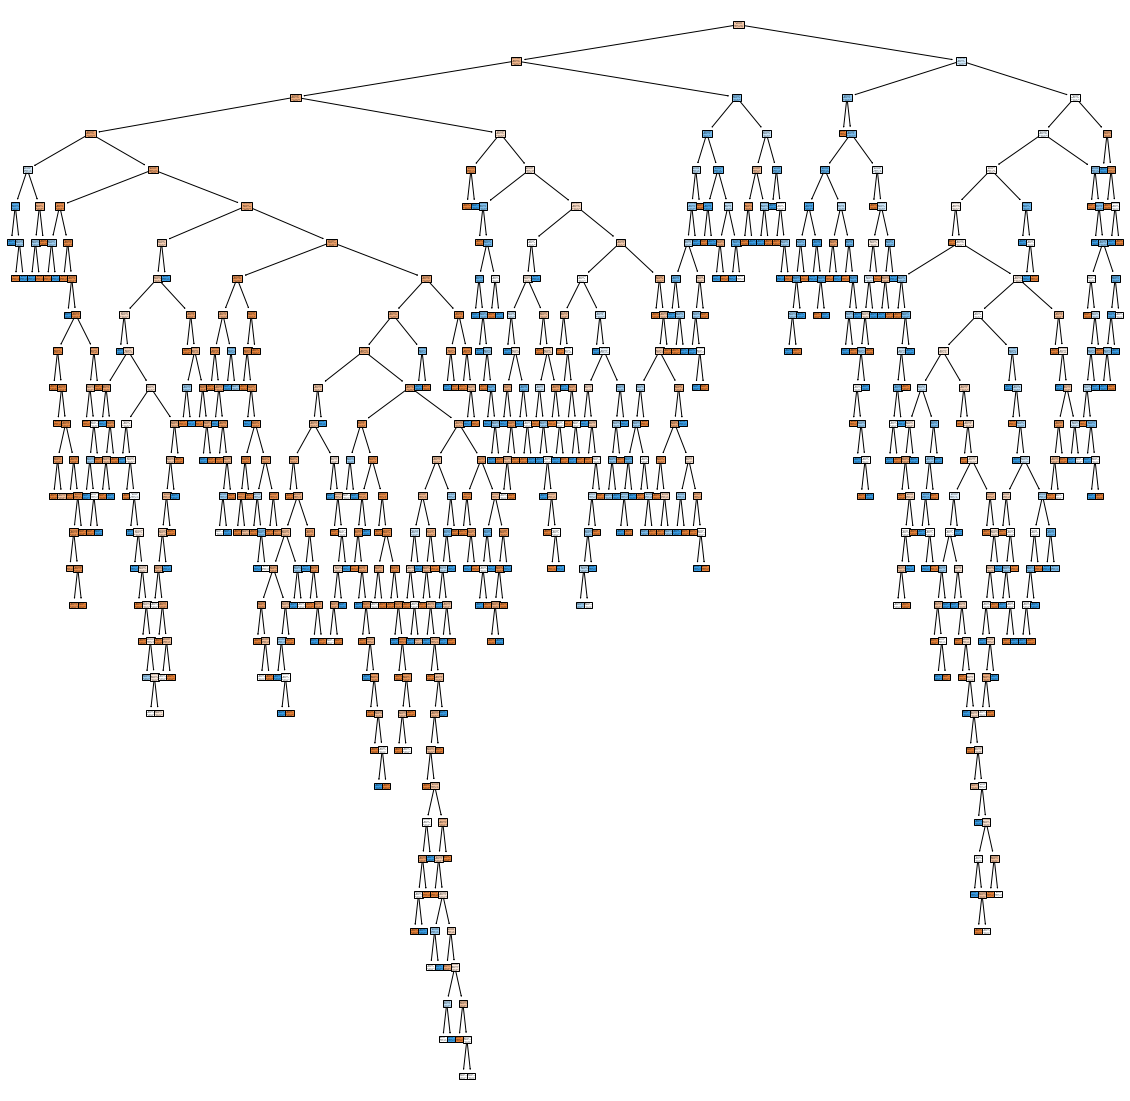

In [35]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True, class_names = [str(i) for i in set(y)],feature_names=x.columns)
plt.savefig('dt_model')

In [36]:
dt_model.predict(x_test)

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [37]:
dt_model.score(x_train,y_train)

0.9446564885496184

In [38]:
dt_model.score(x_test,y_test)

0.6755725190839694